# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import copy

## Import data

In [2]:
energy_df = pd.read_csv('./data/energy_dataset.csv')
weather_df = pd.read_csv('./data/weather_features.csv')

## Energy Dataset

In [3]:
print(f"Shape of energy dataset: {energy_df.shape}")

Shape of energy dataset: (35064, 29)


In [4]:
energy_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [5]:
energy_summary = energy_df.describe().style.set_caption('Summary Statistics for Energy Data').format(precision=2).background_gradient(cmap='Blues')
display(energy_summary)

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.00,35046.00,35046.00,35046.00,35046.00,35045.00,35046.00,35046.00,35046.00,0.00,35045.00,35045.00,35046.00,35045.00,35047.00,35046.00,35046.00,35046.00,35045.00,35046.00,35046.00,35064.00,0.00,35064.00,35064.00,35028.00,35064.00,35064.00
mean,383.51,448.06,0.00,5622.74,4256.07,298.32,0.00,0.00,0.00,nan,475.58,972.12,2605.11,0.00,6263.91,60.23,85.64,1432.67,269.45,0.00,5464.48,1439.07,nan,5471.22,28712.13,28696.94,49.87,57.88
std,85.35,354.57,0.00,2201.83,1961.60,52.52,0.00,0.00,0.00,nan,792.41,400.78,1835.20,0.00,839.67,20.24,14.08,1680.12,50.20,0.00,3213.69,1677.70,nan,3176.31,4594.10,4574.99,14.62,14.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,237.00,18105.00,18041.00,2.06,9.33
25%,333.00,0.00,0.00,4126.00,2527.00,263.00,0.00,0.00,0.00,nan,0.00,637.00,1077.25,0.00,5760.00,53.00,73.00,71.00,240.00,0.00,2933.00,69.00,nan,2979.00,24793.75,24807.75,41.49,49.35
50%,367.00,509.00,0.00,4969.00,4474.00,300.00,0.00,0.00,0.00,nan,68.00,906.00,2164.00,0.00,6566.00,57.00,88.00,616.00,279.00,0.00,4849.00,576.00,nan,4855.00,28906.00,28901.00,50.52,58.02
75%,433.00,757.00,0.00,6429.00,5838.75,330.00,0.00,0.00,0.00,nan,616.00,1250.00,3757.00,0.00,7025.00,80.00,97.00,2578.00,310.00,0.00,7398.00,2636.00,nan,7353.00,32263.25,32192.00,60.53,68.01
max,592.00,999.00,0.00,20034.00,8359.00,449.00,0.00,0.00,0.00,nan,4523.00,2000.00,9728.00,0.00,7117.00,106.00,119.00,5792.00,357.00,0.00,17436.00,5836.00,nan,17430.00,41390.00,41015.00,101.99,116.80


In [6]:
print(energy_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

It shows all columns in energy dataset are floating point numbers expect time is in timestamp format (type=object in python).

#### Check Null Values

In [7]:
print("Number of NULL values in energy dataset:\n{0}".format(energy_df.isnull().sum()))

Number of NULL values in energy dataset:
time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
gener

It shows columns `generation hydro pumped storage aggregated` and `forecast wind offshore eday ahead` are all NULL and these columns will be dropped

#### Drop columns with all null values

In [8]:
energy_df = energy_df.drop(columns=['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'])

#### Check rows with any null values

In [9]:
energy_df[energy_df.isnull().any(axis=1)]

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
99,2015-01-05 03:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,546.0,8233.0,21912.0,21182.0,35.20,59.68
108,2015-01-05 12:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3932.0,9258.0,23209.0,NaN,35.50,79.14
109,2015-01-05 13:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4236.0,9156.0,23725.0,NaN,36.80,73.95
110,2015-01-05 14:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4215.0,9072.0,23614.0,NaN,32.50,71.93
111,2015-01-05 15:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4050.0,8779.0,22381.0,NaN,30.00,71.50
112,2015-01-05 16:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3728.0,8426.0,21371.0,NaN,30.00,71.85
113,2015-01-05 17:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3175.0,7946.0,20760.0,NaN,30.60,80.53
451,2015-01-19 19:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,91.0,6434.0,38642.0,39304.0,70.01,88.95
452,2015-01-19 20:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28.0,6907.0,38758.0,39262.0,69.00,87.94
643,2015-01-27 19:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,182.0,9807.0,38968.0,38335.0,66.00,83.97


For Energy Generation columns, there are\
24 rows with missing energy generation data\
17 rows with missing values in all columns for energy generation\
1 row with missing values in all energy generation columns expect nuclear energy generation\
6 row with missing values in one of the columns [`generation biomass`, `generation fossil oil`, `generation hydro pumped storage consumption`, `generation hydro run-of-river and poundage`, `generation marine`, `generation waste`]

Check timestamps with missing energy generation data

In [10]:
energy_gen_df = copy.deepcopy(energy_df[energy_df.columns[:21]])
print(energy_gen_df[energy_gen_df.isnull().any(axis=1)]['time'])

99       2015-01-05 03:00:00+01:00
108      2015-01-05 12:00:00+01:00
109      2015-01-05 13:00:00+01:00
110      2015-01-05 14:00:00+01:00
111      2015-01-05 15:00:00+01:00
112      2015-01-05 16:00:00+01:00
113      2015-01-05 17:00:00+01:00
451      2015-01-19 19:00:00+01:00
452      2015-01-19 20:00:00+01:00
643      2015-01-27 19:00:00+01:00
661      2015-01-28 13:00:00+01:00
2528     2015-04-16 09:00:00+02:00
2708     2015-04-23 21:00:00+02:00
3968     2015-06-15 09:00:00+02:00
6586     2015-10-02 11:00:00+02:00
8049     2015-12-02 09:00:00+01:00
11236    2016-04-13 05:00:00+02:00
12672    2016-06-12 01:00:00+02:00
13341    2016-07-09 22:00:00+02:00
13391    2016-07-12 00:00:00+02:00
15598    2016-10-11 23:00:00+02:00
15982    2016-10-27 23:00:00+02:00
16612    2016-11-23 04:00:00+01:00
30896    2018-07-11 09:00:00+02:00
Name: time, dtype: object


Missing values are observed in the energy generation data between 2015-01-05 12:00:00 and 17:00:00 (6-hours gap in hourly data), and other scattered timestamps.

In [11]:
energy_load_df = copy.deepcopy(energy_df[['time', 'total load actual']])
print(f"There are {len(energy_load_df[energy_load_df.isnull().any(axis=1)]['time'])} rows with missing energy consumption data")

There are 36 rows with missing energy consumption data


Missing values are observed in the energy generation data between 2015-01-05 12:00:00 and 17:00:00 (6-hours gap in hourly data), 2015-02-01 07:00:00 and 9:00:00 (3-hours gap in hourly data) and 2015-02-01 12:00:00 and 19:00:00 (8-hours gap in hourly data), and other scattered timestamps.

#### Change index to time

In [12]:
energy_df.set_index('time', inplace=True)
energy_df.index = pd.to_datetime(energy_df.index, utc=True).tz_convert('Etc/GMT-1')

#### Fill Missing values

Since gaps <= 6 hours are moderate gaps and 8 hours is large gap, we would like to
- Use time interpolation to fill gaps <= 6 hours
- Use hourly mean to fill gaps > 6 hours

In [13]:
energy_df = energy_df.interpolate(method='time', limit=6)

In [14]:
hourly_mean = energy_df.groupby(energy_df.index.hour).transform('mean')
energy_df = energy_df.fillna(hourly_mean)

In [15]:
energy_df

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,863.0,...,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,920.0,...,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,1164.0,...,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,1503.0,...,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,1826.0,...,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,1.0,...,85.0,277.0,0.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,1.0,...,33.0,280.0,0.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,50.0,...,31.0,286.0,0.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30


In [16]:
energy_df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35064.000000,35064.000000,35064.0,35064.000000,35064.000000,35064.000000,35064.0,35064.0,35064.0,35064.000000,...,35064.000000,35064.000000,35064.0,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.531343,448.094570,0.0,5622.700647,4256.531271,298.342417,0.0,0.0,0.0,475.582706,...,1432.818546,269.418692,0.0,5464.980450,1439.066735,5471.216689,28712.129962,28698.143868,49.874341,57.884023
std,85.346266,354.618269,0.0,2201.510984,1961.988937,52.519927,0.0,0.0,0.0,792.312704,...,1679.961733,50.218423,0.0,3213.586296,1677.703355,3176.312853,4594.100854,4575.716099,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,0.000000,...,71.000000,240.000000,0.0,2933.000000,69.000000,2979.000000,24793.750000,24807.000000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.500000,4475.000000,300.000000,0.0,0.0,0.0,68.000000,...,616.000000,279.000000,0.0,4849.500000,576.000000,4855.000000,28906.000000,28902.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5839.000000,330.000000,0.0,0.0,0.0,616.000000,...,2579.000000,310.000000,0.0,7399.500000,2636.000000,7353.000000,32263.250000,32194.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,4523.000000,...,5792.000000,357.000000,0.0,17436.000000,5836.000000,17430.000000,41390.000000,41015.000000,101.990000,116.800000


We found columns [`generation fossil coal-derived gas`, `generation fossil oil shale`, `generation fossil peat`, `generation geothermal`, `generation marine`, `generation wind offshore`, `generation wind onshore`] are all zeros. Therefore, they contain no information and can be removed.

### Drop columns with all constants

In [17]:
energy_df = energy_df.drop(columns=['generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation marine', 'generation wind offshore', 'generation wind onshore'])

### Drop price related columns

In [18]:
energy_df = energy_df.drop(columns=['price day ahead', 'price actual'])

In [19]:
energy_df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.531343,448.094570,5622.700647,4256.531271,298.342417,475.582706,972.201902,2605.534123,6263.483430,60.226030,85.634326,1432.818546,269.418692,1439.066735,5471.216689,28712.129962,28698.143868
std,85.346266,354.618269,2201.510984,1961.988937,52.519927,792.312704,400.712304,1835.175078,840.272333,20.238792,14.076948,1679.961733,50.218423,1677.703355,3176.312853,4594.100854,4575.716099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,18105.000000,18041.000000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1078.000000,5759.000000,53.000000,73.000000,71.000000,240.000000,69.000000,2979.000000,24793.750000,24807.000000
50%,367.000000,509.000000,4969.500000,4475.000000,300.000000,68.000000,906.000000,2165.000000,6564.000000,57.000000,88.000000,616.000000,279.000000,576.000000,4855.000000,28906.000000,28902.000000
75%,433.000000,757.000000,6429.000000,5839.000000,330.000000,616.000000,1250.000000,3758.000000,7025.000000,80.000000,97.000000,2579.000000,310.000000,2636.000000,7353.000000,32263.250000,32194.000000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,5836.000000,17430.000000,41390.000000,41015.000000


### Check Outliers

In [20]:
energy_cols = ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'total load actual']

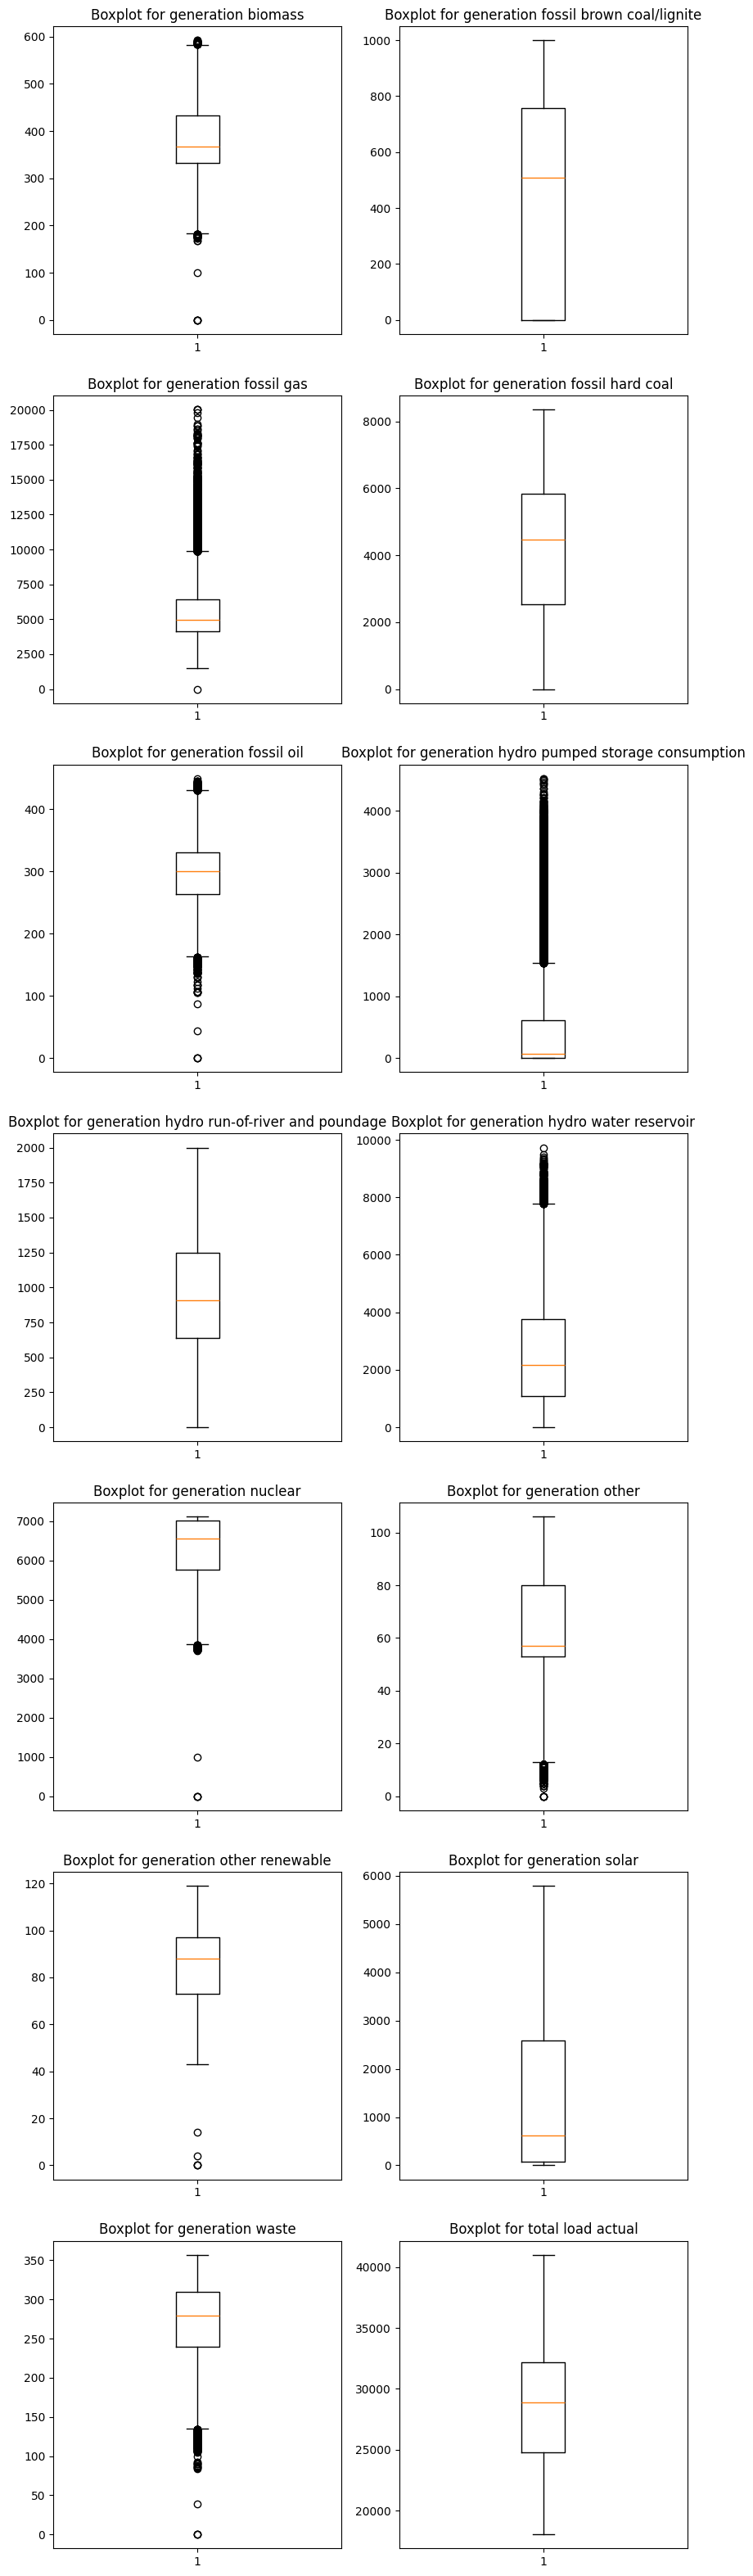

In [21]:
fig, axes = plt.subplots(7, 2, figsize=(10, 40))

for idx, feature in enumerate(energy_cols):
    row = idx // 2
    col = idx % 2
    axes[row, col].boxplot([energy_df[feature],])
    axes[row, col].set_title("Boxplot for "+feature)

It shows there is no obvious outliers that need to be removed.

## Weather Dataset

In [22]:
print(f"Shape of weather dataset: {weather_df.shape}")

Shape of weather dataset: (178396, 17)


In [23]:
weather_df.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [24]:
weather_summary = weather_df.describe().style.set_caption('Summary Statistics for Weather Data').format(precision=2).background_gradient(cmap='Blues')
display(weather_summary)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00
mean,289.62,288.33,291.09,1069.26,68.42,2.47,166.59,0.08,0.00,0.00,25.07,759.83
std,8.03,7.96,8.61,5969.63,21.90,2.10,116.61,0.40,0.01,0.22,30.77,108.73
min,262.24,262.24,262.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00
25%,283.67,282.48,284.65,1013.00,53.00,1.00,55.00,0.00,0.00,0.00,0.00,800.00
50%,289.15,288.15,290.15,1018.00,72.00,2.00,177.00,0.00,0.00,0.00,20.00,800.00
75%,295.15,293.73,297.15,1022.00,87.00,4.00,270.00,0.00,0.00,0.00,40.00,801.00
max,315.60,315.15,321.15,1008371.00,100.00,133.00,360.00,12.00,2.31,21.50,100.00,804.00


In [25]:
print(weather_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

It shows `dt_iso`is in timestamp format, `city_name`, `weather_main`, `weather_description` and `weather_icon` are strings,  the other columns in energy dataset are floating point numbers.

In [26]:
weather_df['weather_description'].value_counts()

weather_description
sky is clear                    82685
few clouds                      32101
broken clouds                   17448
scattered clouds                15945
light rain                      10905
mist                             3908
moderate rain                    3621
overcast clouds                  2561
fog                              2506
light intensity drizzle          1241
heavy intensity rain             1142
light intensity shower rain       657
proximity thunderstorm            480
proximity shower rain             476
haze                              435
shower rain                       426
drizzle                           369
dust                              345
thunderstorm                      309
light snow                        140
thunderstorm with rain            127
thunderstorm with light rain       92
heavy intensity shower rain        81
light intensity drizzle rain       79
very heavy rain                    78
snow                          

In [27]:
weather_df['weather_main'].value_counts()

weather_main
clear           82685
clouds          68055
rain            17391
mist             3908
fog              2506
drizzle          1724
thunderstorm     1041
haze              435
dust              347
snow              270
smoke              33
squall              1
Name: count, dtype: int64

In [28]:
weather_df['weather_icon'].value_counts()

weather_icon
01n    38541
01d    34830
02d    19199
02n    12368
04d     9137
04n     8403
03d     7870
10n     5951
01      5946
03n     5833
10      4917
10d     4882
50n     4288
02      3902
50d     2942
04      2469
03      2242
09d     1976
09n     1389
11d      624
11n      417
13d      130
13n      103
13        37
Name: count, dtype: int64

#### Check Null Values

In [29]:
print("Number of NULL values in weather dataset:\n{0}".format(weather_df.isnull().sum()))

Number of NULL values in weather dataset:
dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64


It shows all columns in weather dataset have no null values.

#### Check if there are duplicates in dataframe and drop them

In [30]:
print(f"Check if there are duplicated data: {weather_df.duplicated().any()}")

Check if there are duplicated data: True


In [31]:
weather_df = weather_df.drop_duplicates().reset_index(drop=True)

In [32]:
weather_df.shape

(178375, 17)

#### Check the unique idenifier of data

In [33]:
weather_df.duplicated(['dt_iso', 'city_name', 'weather_description']).any()

np.False_

Therefore, we can confirm that `dt_iso`, `city_name` and `weather_description` are unique idenifier of data.

#### Check values in columns with string format and weather id

In [34]:
print(f"Unique values of columns `city_name` = {weather_df['city_name'].unique()}")

Unique values of columns `city_name` = ['Valencia' 'Madrid' 'Bilbao' ' Barcelona' 'Seville']


In [35]:
print(f"Unique values of columns `weather_main` = {weather_df['weather_id'].unique()}")

Unique values of columns `weather_main` = [800 801 802 803 804 500 501 502 701 522 521 503 202 200 201 211 520 300
 741 301 711 302 721 310 600 616 615 601 210 602 611 311 612 620 531 731
 761 771]


In [36]:
print(f"Unique values of columns `weather_main` = {weather_df['weather_main'].unique()}")

Unique values of columns `weather_main` = ['clear' 'clouds' 'rain' 'mist' 'thunderstorm' 'drizzle' 'fog' 'smoke'
 'haze' 'snow' 'dust' 'squall']


In [37]:
print(f"Unique values of columns `weather_description` = {weather_df['weather_description'].unique()}")

Unique values of columns `weather_description` = ['sky is clear' 'few clouds' 'scattered clouds' 'broken clouds'
 'overcast clouds' 'light rain' 'moderate rain' 'heavy intensity rain'
 'mist' 'heavy intensity shower rain' 'shower rain' 'very heavy rain'
 'thunderstorm with heavy rain' 'thunderstorm with light rain'
 'thunderstorm with rain' 'proximity thunderstorm' 'thunderstorm'
 'light intensity shower rain' 'light intensity drizzle' 'fog' 'drizzle'
 'smoke' 'heavy intensity drizzle' 'haze' 'proximity shower rain'
 'light intensity drizzle rain' 'light snow' 'rain and snow'
 'light rain and snow' 'snow' 'light thunderstorm' 'heavy snow' 'sleet'
 'rain and drizzle' 'shower sleet' 'light shower sleet'
 'light shower snow' 'proximity moderate rain' 'ragged shower rain'
 'sand dust whirls' 'proximity drizzle' 'dust' 'squalls']


In [38]:
print(f"Unique values of columns `weather_icon` = {weather_df['weather_icon'].unique()}")

Unique values of columns `weather_icon` = ['01n' '01d' '01' '02n' '02d' '02' '03' '04n' '04' '10n' '03n' '10' '04d'
 '03d' '10d' '50d' '09n' '11d' '11n' '09d' '50n' '13d' '13n' '13']


We observed that `weather_description` seems to be a more detailed version of `weather_main` and we would like to check it and the relationship  between `weather_description` and `weather_id` as follows. Moreover, `weather_icon` indicates the weather icon code for website (from metadata) and contains no useful information for prediction.

In [39]:
print(f"Check mapping from `weather_main` to `weather_description` that whether rows with same `weather_description` value map to same `weather_main`: {len(weather_df.groupby('weather_description')['weather_main'].nunique().loc[lambda s: s > 1])==0}")

Check mapping from `weather_main` to `weather_description` that whether rows with same `weather_description` value map to same `weather_main`: True


In [40]:
print(f"Check mapping from `weather_id` to `weather_description` that whether rows with same `weather_description` value map to same `weather_id`: {len(weather_df.groupby('weather_description')['weather_id'].nunique().loc[lambda s: s > 1])==0}")

Check mapping from `weather_id` to `weather_description` that whether rows with same `weather_description` value map to same `weather_id`: True


It shows `weather_description` uniquely determines `weather_main` and `weather_id`. Therefore, `weather_main` and `weather_id` contains no additional information and can be dropped.

#### Drop columns [`weather_main`, `weather_id`, `weather_icon`]

In [41]:
weather_df = weather_df.drop(columns=['weather_main', 'weather_id', 'weather_icon'])

Since we oberserved that rows of data of same `dt_iso` and `city_name` may have multiple `weather_description` (`weather_id`), we would like to encode the column `weather_description` by one-hot encoding.

### One-Hot Encoding

In [42]:
weather_df = pd.get_dummies(weather_df, columns=['weather_description'])

In [43]:
grp_cols = ['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
            'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
            'clouds_all']

In [44]:
weather_description_cols = [col for col in weather_df.columns if col.startswith('weather_description')]

In [45]:
weather_df = weather_df.groupby(grp_cols)[weather_description_cols].sum().reset_index()

In [46]:
print(f"Check if [`dt_iso`, `city_name`] are unique identifiers: {not weather_df.duplicated(['dt_iso', 'city_name']).any()}")

Check if [`dt_iso`, `city_name`] are unique identifiers: True


In [47]:
weather_df.shape

(175320, 56)

### Reformat dataframe

In [48]:
weather_dfs = []
for city_name in weather_df['city_name'].unique():
    city_df = weather_df[weather_df['city_name']==city_name].copy()
    city_df = city_df.drop(columns=['city_name'])
    city_df.set_index('dt_iso', inplace=True)
    city_df.index = pd.to_datetime(city_df.index, utc=True).tz_convert('Etc/GMT-1')
    city = city_name.strip()
    city_df = city_df.add_suffix(f'_{city}')
    weather_dfs.append(city_df)
    print(city, city_df.shape)

Barcelona (35064, 54)
Bilbao (35064, 54)
Madrid (35064, 54)
Seville (35064, 54)
Valencia (35064, 54)


In [49]:
all_weather_df = pd.concat(weather_dfs, axis=1)

### Check for and remove columns with all zeros or constant values

In [50]:
const_cols = all_weather_df.columns[all_weather_df.nunique() == 1]
print(const_cols.tolist())
print(len(const_cols.tolist()))

['snow_3h_Barcelona', 'weather_description_dust_Barcelona', 'weather_description_haze_Barcelona', 'weather_description_light rain and snow_Barcelona', 'weather_description_light shower sleet_Barcelona', 'weather_description_light shower snow_Barcelona', 'weather_description_light thunderstorm_Barcelona', 'weather_description_ragged shower rain_Barcelona', 'weather_description_shower sleet_Barcelona', 'weather_description_smoke_Barcelona', 'weather_description_squalls_Barcelona', 'weather_description_dust_Bilbao', 'weather_description_heavy snow_Bilbao', 'weather_description_light thunderstorm_Bilbao', 'weather_description_proximity drizzle_Bilbao', 'weather_description_sand dust whirls_Bilbao', 'weather_description_smoke_Bilbao', 'weather_description_squalls_Bilbao', 'weather_description_very heavy rain_Bilbao', 'weather_description_dust_Madrid', 'weather_description_light shower sleet_Madrid', 'weather_description_light shower snow_Madrid', 'weather_description_proximity drizzle_Madri

We found 62 columns =[`snow_3h_Barcelona`, `weather_description_dust_Barcelona`, `weather_description_haze_Barcelona`, `weather_description_light rain and snow_Barcelona`, `weather_description_light shower sleet_Barcelona`, `weather_description_light shower snow_Barcelona`, `weather_description_light thunderstorm_Barcelona`, `weather_description_ragged shower rain_Barcelona`, `weather_description_shower sleet_Barcelona`, `weather_description_smoke_Barcelona`, `weather_description_squalls_Barcelona`, `weather_description_dust_Bilbao`, `weather_description_heavy snow_Bilbao`, `weather_description_light thunderstorm_Bilbao`, `weather_description_proximity drizzle_Bilbao`, `weather_description_sand dust whirls_Bilbao`, `weather_description_smoke_Bilbao`, `weather_description_squalls_Bilbao`, `weather_description_very heavy rain_Bilbao`, `weather_description_dust_Madrid`, `weather_description_light shower sleet_Madrid`, `weather_description_light shower snow_Madrid`, `weather_description_proximity drizzle_Madrid`, `weather_description_proximity moderate rain_Madrid`, `weather_description_ragged shower rain_Madrid`, `weather_description_sand dust whirls_Madrid`, `weather_description_shower sleet_Madrid`, `weather_description_smoke_Madrid`, `weather_description_squalls_Madrid`, `weather_description_very heavy rain_Madrid`, `snow_3h_Seville`, `weather_description_heavy snow_Seville`, `weather_description_light rain and snow_Seville`, `weather_description_light shower sleet_Seville`, `weather_description_light shower snow_Seville`, `weather_description_light snow_Seville`, `weather_description_ragged shower rain_Seville`, `weather_description_rain and snow_Seville`, `weather_description_sand dust whirls_Seville`, `weather_description_shower sleet_Seville`, `weather_description_sleet_Seville`, `weather_description_snow_Seville`, `weather_description_very heavy rain_Seville`, `weather_description_dust_Valencia`, `weather_description_heavy snow_Valencia`, `weather_description_light intensity drizzle rain_Valencia`, `weather_description_light rain and snow_Valencia`, `weather_description_light shower sleet_Valencia`, `weather_description_light shower snow_Valencia`, `weather_description_light snow_Valencia`, `weather_description_light thunderstorm_Valencia`, `weather_description_proximity drizzle_Valencia`, `weather_description_proximity moderate rain_Valencia`, `weather_description_proximity shower rain_Valencia`, `weather_description_ragged shower rain_Valencia`, `weather_description_rain and drizzle_Valencia`, `weather_description_rain and snow_Valencia`, `weather_description_sand dust whirls_Valencia`, `weather_description_shower sleet_Valencia`, `weather_description_sleet_Valencia`, `weather_description_snow_Valencia`, `weather_description_squalls_Valencia`] are all zeros. Therefore, they contain no information and can be removed.

In [51]:
all_weather_df = all_weather_df.drop(columns=const_cols)

### Check Outliers

In [52]:
weather_cols_no_description = [col for col in all_weather_df.columns if 'weather_description' not in col]

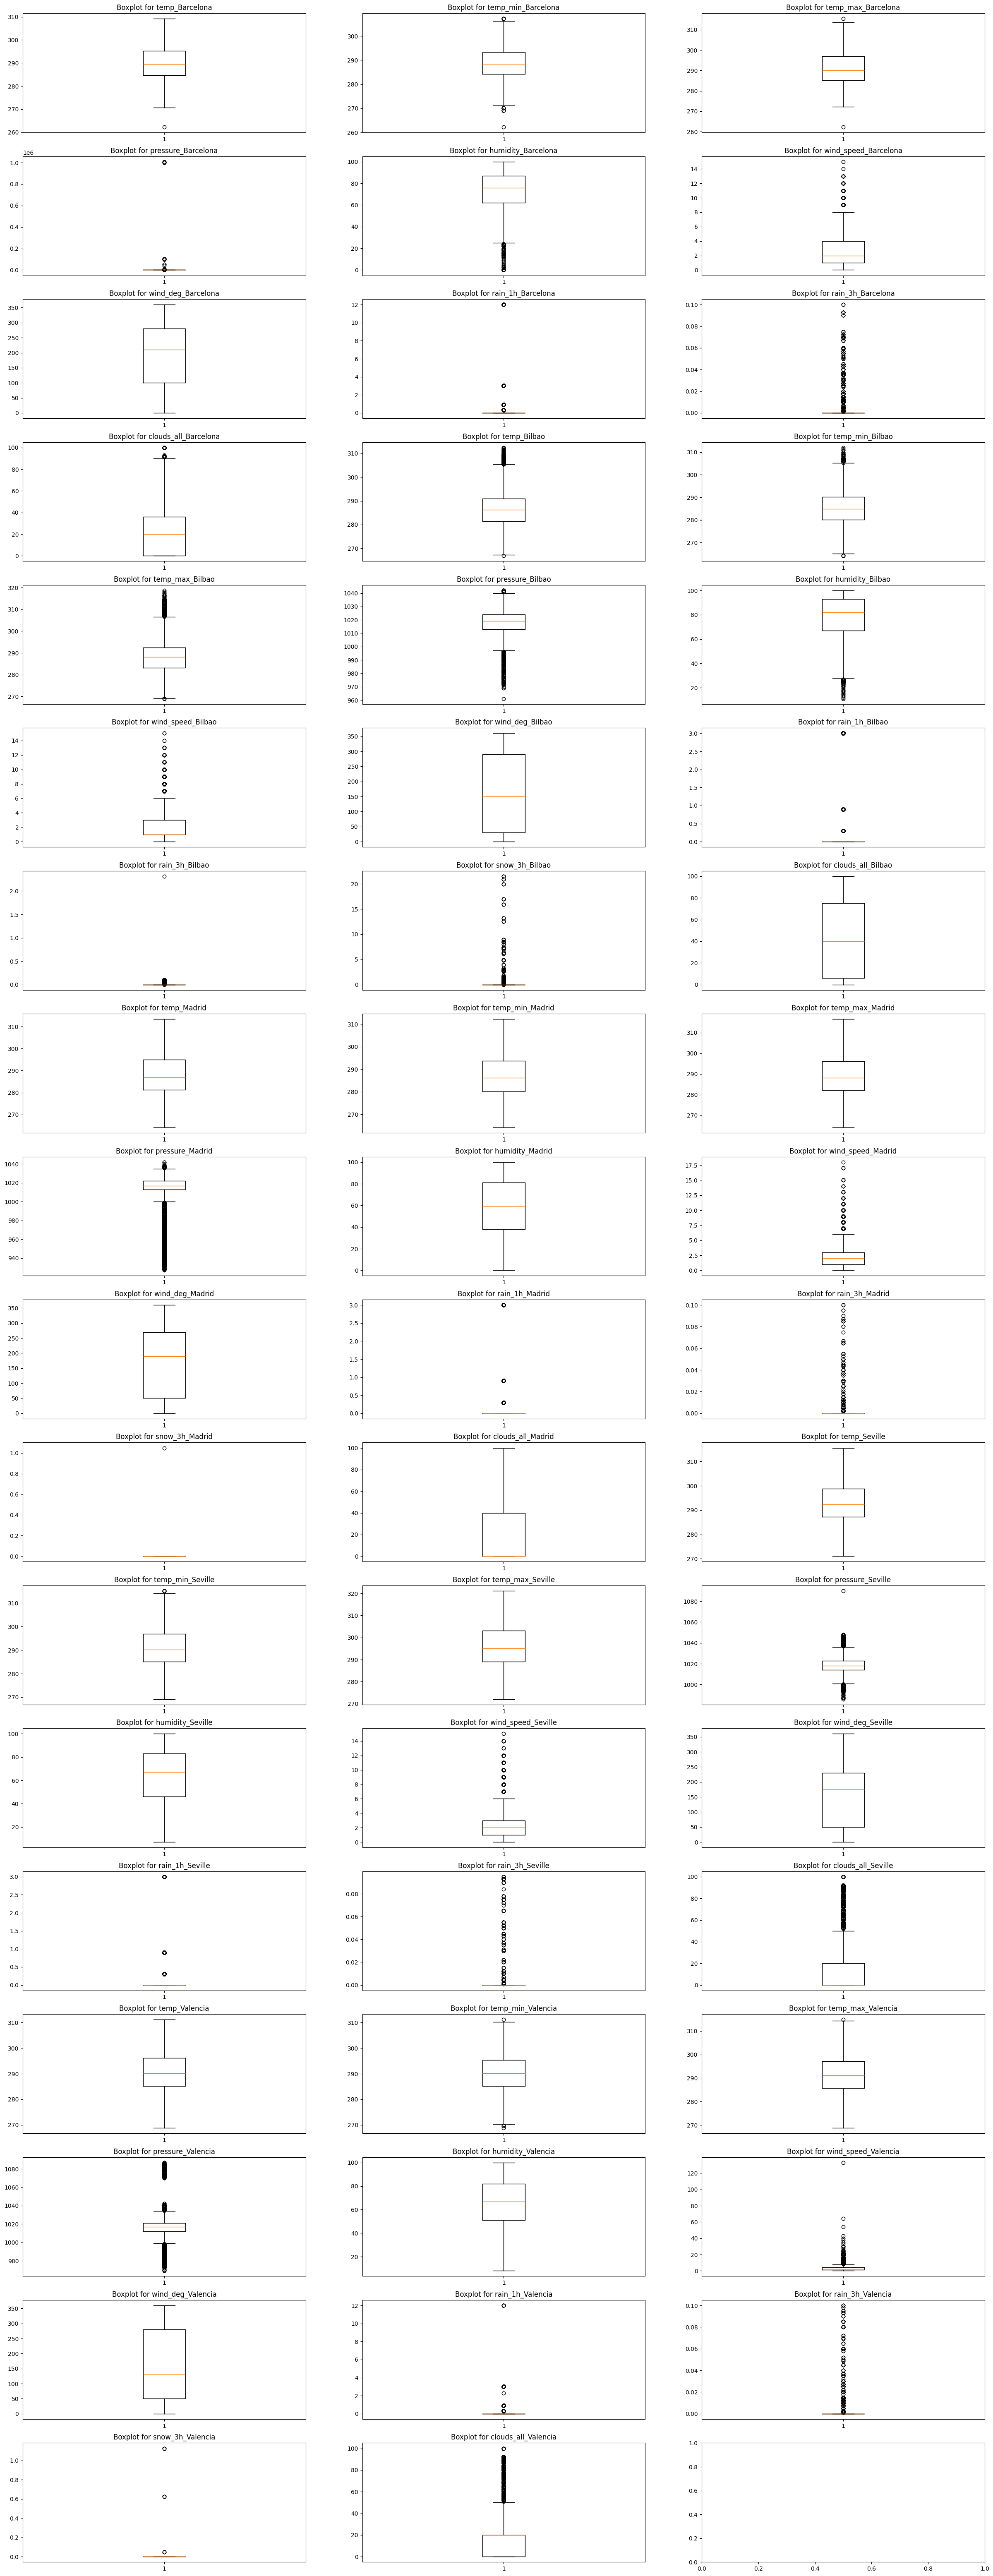

In [53]:
fig, axes = plt.subplots(18, 3, figsize=(30, 80))

for idx, feature in enumerate(weather_cols_no_description):
    row = idx // 3
    col = idx % 3
    axes[row, col].boxplot([all_weather_df[feature],])
    axes[row, col].set_title("Boxplot for "+feature)

We observed the column [`pressure_Barcelona`, `pressure_Seville`, `wind_speed_Valencia`] may contain extreme outlier and we will plot it for further analysis.


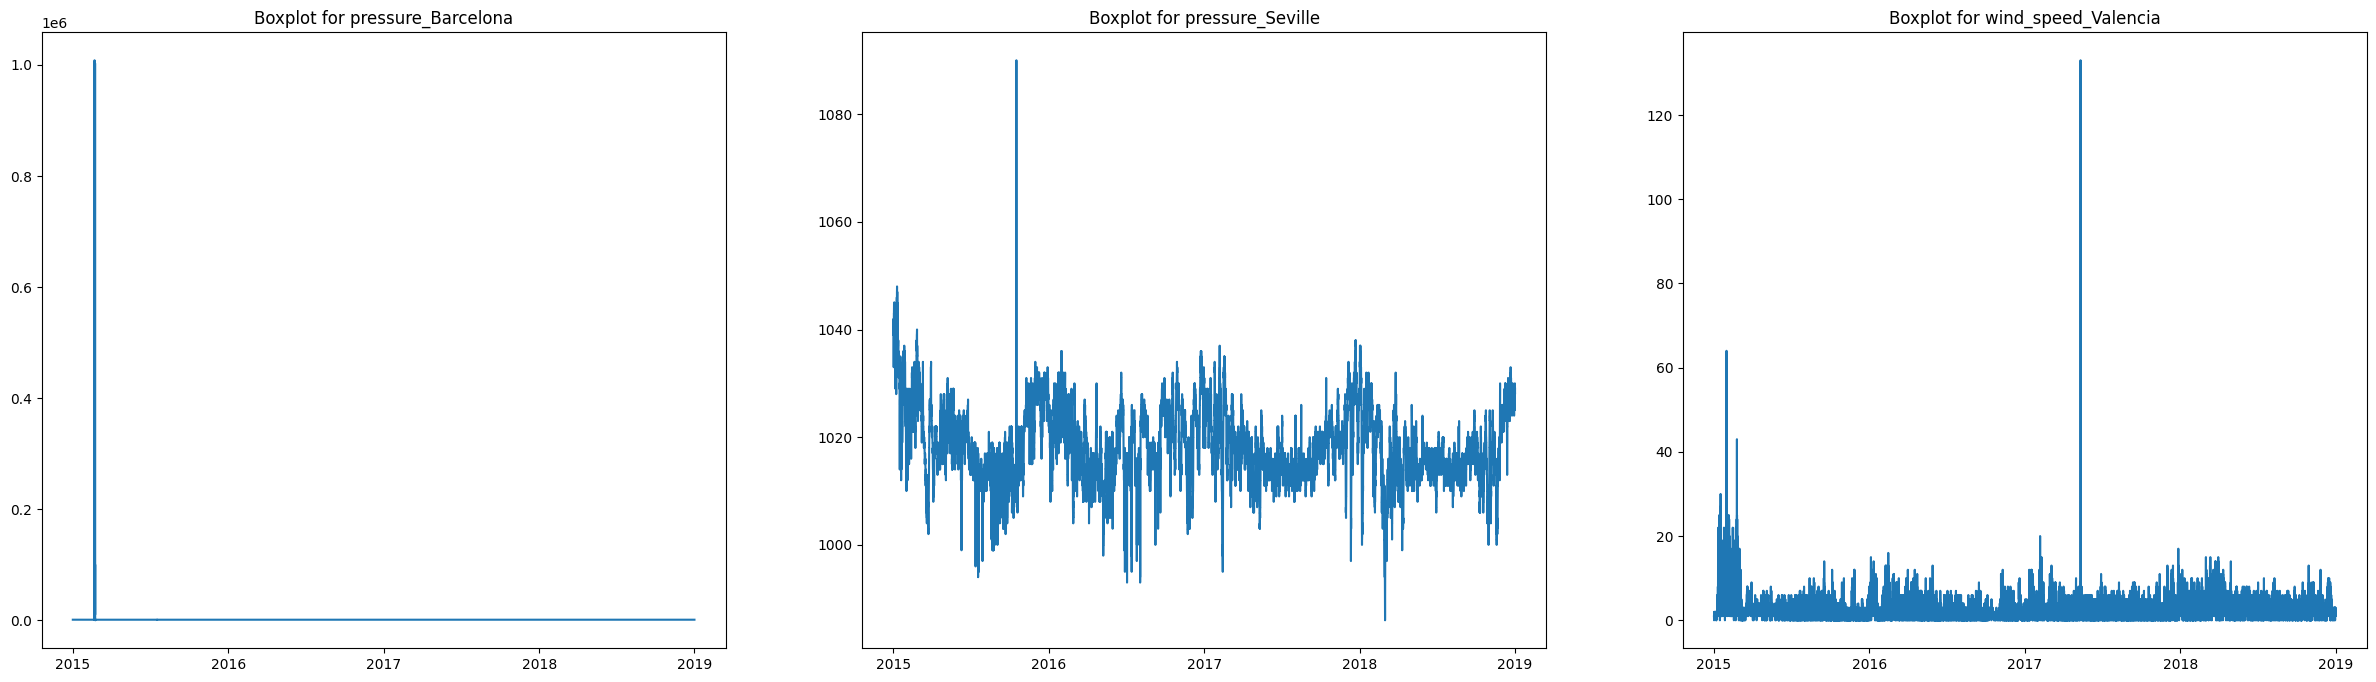

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(30, 8))

for idx, feature in enumerate(['pressure_Barcelona', 'pressure_Seville', 'wind_speed_Valencia']):
    axes[idx].plot(all_weather_df[feature])
    axes[idx].set_title("Boxplot for "+feature)
    axes[idx].xaxis.set_major_locator(mdates.YearLocator())

In [55]:
all_weather_df[all_weather_df['pressure_Barcelona']>2e5]

,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,rain_3h_Barcelona,clouds_all_Barcelona,...,weather_description_proximity thunderstorm_Valencia,weather_description_scattered clouds_Valencia,weather_description_shower rain_Valencia,weather_description_sky is clear_Valencia,weather_description_smoke_Valencia,weather_description_thunderstorm_Valencia,weather_description_thunderstorm with heavy rain_Valencia,weather_description_thunderstorm with light rain_Valencia,weather_description_thunderstorm with rain_Valencia,weather_description_very heavy rain_Valencia
dt_iso,,,,,,,,,,,,,,,,,,,,,
2015-02-21 02:00:00+01:00,283.25,283.25,283.25,1008371,0,3,337,12.0,0.0,12,...,0,1,0,0,0,0,0,0,0,0
2015-02-21 09:00:00+01:00,284.05,284.05,284.05,1001781,0,9,292,0.0,0.0,92,...,0,0,0,0,0,0,0,0,0,0
2015-02-21 10:00:00+01:00,284.05,284.05,284.05,1001501,0,2,337,0.0,0.0,92,...,0,0,0,0,0,0,0,0,0,0
2015-02-21 11:00:00+01:00,274.65,274.65,274.65,1000951,0,2,337,0.3,0.0,92,...,0,0,0,0,0,0,0,0,0,0
2015-02-22 07:00:00+01:00,279.87,279.87,279.87,1002241,0,0,0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2015-02-22 08:00:00+01:00,281.75,281.75,281.75,1002881,0,1,22,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0


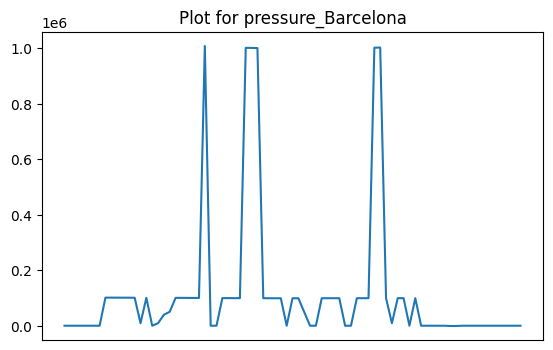

In [56]:
feature = 'pressure_Barcelona'
fig, ax = plt.subplots(figsize=(4*1.618, 4))
ax.plot(all_weather_df[(all_weather_df.index<='2015-02-23 08:00:00+01:00') & (all_weather_df.index>='2015-02-20 02:00:00+01:00')][feature])
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_title(f"Plot for {feature}")
plt.show()

In [57]:
all_weather_df[(all_weather_df.index<='2015-02-22 08:00:00+01:00') & (all_weather_df.index>='2015-02-21 02:00:00+01:00')]['pressure_Barcelona']

dt_iso
2015-02-21 02:00:00+01:00    1008371
2015-02-21 03:00:00+01:00       1012
2015-02-21 04:00:00+01:00       1012
2015-02-21 05:00:00+01:00     100477
2015-02-21 06:00:00+01:00     100390
2015-02-21 07:00:00+01:00     100326
2015-02-21 08:00:00+01:00     100240
2015-02-21 09:00:00+01:00    1001781
2015-02-21 10:00:00+01:00    1001501
2015-02-21 11:00:00+01:00    1000951
2015-02-21 12:00:00+01:00     100078
2015-02-21 13:00:00+01:00     100021
2015-02-21 14:00:00+01:00      99915
2015-02-21 15:00:00+01:00      99873
2015-02-21 16:00:00+01:00        999
2015-02-21 17:00:00+01:00      99908
2015-02-21 18:00:00+01:00      99882
2015-02-21 19:00:00+01:00      50444
2015-02-21 20:00:00+01:00       1005
2015-02-21 21:00:00+01:00        999
2015-02-21 22:00:00+01:00     100024
2015-02-21 23:00:00+01:00     100025
2015-02-22 00:00:00+01:00     100044
2015-02-22 01:00:00+01:00     100064
2015-02-22 02:00:00+01:00       1001
2015-02-22 03:00:00+01:00       1000
2015-02-22 04:00:00+01:00     1

In [58]:
all_weather_df[all_weather_df['pressure_Barcelona']>2000]['pressure_Barcelona']

dt_iso
2015-02-20 09:00:00+01:00     102153
2015-02-20 10:00:00+01:00     102132
2015-02-20 11:00:00+01:00     102075
2015-02-20 12:00:00+01:00     101983
2015-02-20 13:00:00+01:00     101921
2015-02-20 14:00:00+01:00     101756
2015-02-20 15:00:00+01:00      10163
2015-02-20 16:00:00+01:00     101574
2015-02-20 18:00:00+01:00      10145
2015-02-20 19:00:00+01:00      40542
2015-02-20 20:00:00+01:00      51177
2015-02-20 21:00:00+01:00     101338
2015-02-20 22:00:00+01:00     101324
2015-02-20 23:00:00+01:00     101162
2015-02-21 00:00:00+01:00     101061
2015-02-21 01:00:00+01:00     101007
2015-02-21 02:00:00+01:00    1008371
2015-02-21 05:00:00+01:00     100477
2015-02-21 06:00:00+01:00     100390
2015-02-21 07:00:00+01:00     100326
2015-02-21 08:00:00+01:00     100240
2015-02-21 09:00:00+01:00    1001781
2015-02-21 10:00:00+01:00    1001501
2015-02-21 11:00:00+01:00    1000951
2015-02-21 12:00:00+01:00     100078
2015-02-21 13:00:00+01:00     100021
2015-02-21 14:00:00+01:00      

The plots show there is extreme outliers in [`pressure_Barcelona`, `pressure_Seville`, `wind_speed_Valencia`] and we will remove them and fill them by interpolation.

In [59]:
all_weather_df.loc[all_weather_df['pressure_Barcelona'] > 2000, 'pressure_Barcelona'] = np.nan
all_weather_df.loc[all_weather_df['pressure_Seville'] > 1060, 'pressure_Seville'] = np.nan
all_weather_df.loc[all_weather_df['wind_speed_Valencia'] > 80, 'wind_speed_Valencia'] = np.nan

In [60]:
hourly_mean = all_weather_df.groupby(all_weather_df.index.hour).transform('mean')
all_weather_df = all_weather_df.fillna(hourly_mean)

In [61]:
hourly_mean = all_weather_df.groupby(all_weather_df.index.hour).transform('mean')
all_weather_df = all_weather_df.fillna(hourly_mean)

In [62]:
all_weather_df.describe()

,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,rain_3h_Barcelona,clouds_all_Barcelona,...,weather_description_proximity thunderstorm_Valencia,weather_description_scattered clouds_Valencia,weather_description_shower rain_Valencia,weather_description_sky is clear_Valencia,weather_description_smoke_Valencia,weather_description_thunderstorm_Valencia,weather_description_thunderstorm with heavy rain_Valencia,weather_description_thunderstorm with light rain_Valencia,weather_description_thunderstorm with rain_Valencia,weather_description_very heavy rain_Valencia
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,...,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,289.867178,288.615102,291.039356,1017.229077,73.830710,2.782740,187.664243,0.108487,0.000331,22.714693,...,0.001369,0.094342,0.000884,0.442961,0.000171,0.001711,0.000200,0.000884,0.000656,0.000171
std,6.723623,6.458640,7.288287,11.021062,17.720809,1.996081,108.564505,0.667771,0.004000,27.328443,...,0.036974,0.292308,0.029721,0.496743,0.013080,0.041331,0.014128,0.029721,0.025603,0.013080
min,262.240000,262.240000,262.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,284.707375,284.150000,285.150000,1014.000000,62.000000,1.000000,100.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,289.411250,288.150000,290.150000,1017.000000,76.000000,2.000000,210.000000,0.000000,0.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,295.150000,293.274000,297.040000,1021.000000,87.000000,4.000000,280.000000,0.000000,0.000000,36.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,309.150000,307.150000,315.370000,1039.000000,100.000000,15.000000,360.000000,12.000000,0.100000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Merging 2 Dataframes

In [63]:
final_df = pd.concat([energy_df, all_weather_df], axis=1)

In [64]:
final_df.to_csv('./data/processed_data.csv', index=True) 

In [65]:
final_df

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,weather_description_proximity thunderstorm_Valencia,weather_description_scattered clouds_Valencia,weather_description_shower rain_Valencia,weather_description_sky is clear_Valencia,weather_description_smoke_Valencia,weather_description_thunderstorm_Valencia,weather_description_thunderstorm with heavy rain_Valencia,weather_description_thunderstorm with light rain_Valencia,weather_description_thunderstorm with rain_Valencia,weather_description_very heavy rain_Valencia
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,0,0,0,1,0,0,0,0,0,0
2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,0,0,0,1,0,0,0,0,0,0
2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,0,0,0,1,0,0,0,0,0,0
2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,0,0,0,1,0,0,0,0,0,0
2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+01:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,...,0,0,0,1,0,0,0,0,0,0
2018-12-31 20:00:00+01:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,...,0,0,0,1,0,0,0,0,0,0
2018-12-31 21:00:00+01:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,...,0,0,0,1,0,0,0,0,0,0
2018-12-31 22:00:00+01:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,...,0,0,0,1,0,0,0,0,0,0
